In [1]:
#Imports
from tcn import TCN, tcn_full_summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
train_data = pd.read_csv('2022-10-12-02-53-15-joint_states.csv')
train_data['.position'] = train_data['.position'].str.strip('()')
train_data['.velocity'] = train_data['.velocity'].str.strip('()')
train_data['.effort'] = train_data['.effort'].str.strip('()')
time_stamp = train_data[['.header.stamp.nsecs']]
position = train_data['.position'].str.split(',', expand=True)
velocity = train_data['.velocity'].str.split(',', expand=True)
effort = train_data['.effort'].str.split(',', expand=True)
features = pd.concat([position, velocity, effort], axis=1)

In [3]:
groundTruth = pd.read_csv("2022-10-12-02-53-15-ground_truth-state.csv", sep=',', nrows=3750)
Xtargets = groundTruth[['.pose.pose.position.x']]
Ytargets = groundTruth[['.pose.pose.position.y']]

In [4]:
x = Xtargets.values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Xtargets = pd.DataFrame(x_scaled)

x = Ytargets.values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Ytargets = pd.DataFrame(x_scaled)

x = features.values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled)

In [5]:
Xtargets = np.asarray(Xtargets).astype(np.float64)
Ytargets = np.asarray(Ytargets).astype(np.float64)
features = np.asarray(features).astype(np.float64)

In [6]:
reconstructed_modelX = keras.models.load_model('C:/Users/Ahmed/Desktop/MLP-TCN/ModelX')
reconstructed_modelY = keras.models.load_model('C:/Users/Ahmed/Desktop/MLP-TCN/ModelY')

In [7]:
n_features = features.shape[-1]
features = features.reshape(-1, 1, n_features)

In [8]:
#Reading Odometry and scaling
odom_data  = pd.read_csv('2022-09-26-18-56-30-odom.csv')
odom_data.drop(['.header.seq', '.header.frame_id', '.child_frame_id', 'time', '.pose.covariance', '.twist.covariance'], axis=1, inplace=True)
dataset_odom = odom_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset_odom)
dataset_odom = pd.DataFrame(x_scaled)
odom = dataset_odom.values
x_odom, y_odom = odom[:, [2]], odom[:, [3]]

In [9]:
x = reconstructed_modelX.predict(features)
y = reconstructed_modelY.predict(features)

118/118 [==============================] - 0s 1ms/step


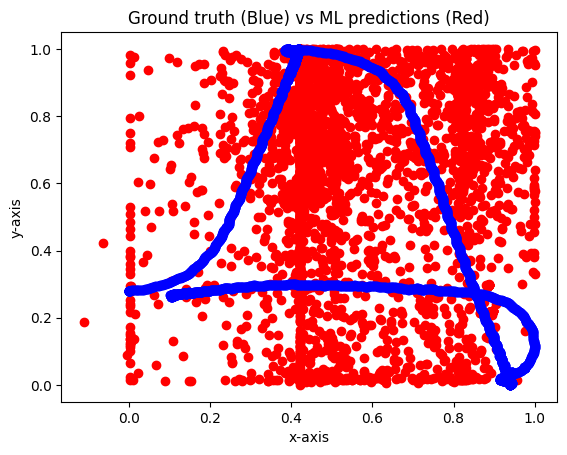

In [10]:
plt.scatter(x, y, color='red')
plt.scatter(Xtargets, Ytargets, color='blue')
#plt.scatter(x_odom, y_odom, color='orange')
plt.title('Ground truth (Blue) vs ML predictions (Red)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()